In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/1100-instagram-users-datetime-posts-data/Instagram_Data.csv


In [2]:
df=pd.read_csv('../input/1100-instagram-users-datetime-posts-data/Instagram_Data.csv')
df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37


<AxesSubplot:xlabel='Hour', ylabel='Density'>

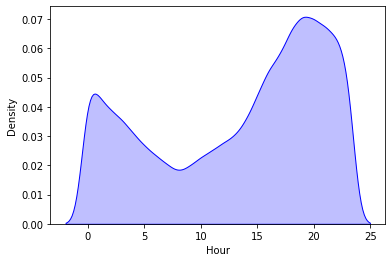

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['Hour'], color='b', shade=True)

In [4]:
from sklearn.model_selection import train_test_split
exampledf=df.loc[df['User uuid']==2]
train, test = train_test_split(exampledf, test_size=0.2)

<AxesSubplot:xlabel='Hour', ylabel='Density'>

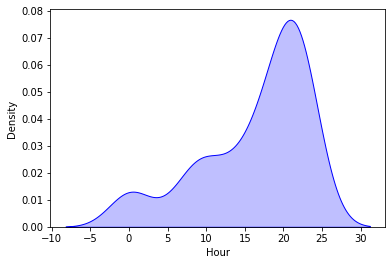

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(train['Hour'], color='b', shade=True)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
models = dict()
models['Linear'] = LinearRegression()
models['TheilSen'] = TheilSenRegressor()
models['Ridge'] = Ridge()
models['Lasso'] = Lasso()
for name, model in models.items():
    model.fit(train[['Month','Day','Hour']],train['Likes Score'])
    predres=model.predict(test[['Month','Day','Hour']])
    rms = mean_squared_error(test['Likes Score'], predres, squared=True)
    mae=metrics.mean_absolute_error(test['Likes Score'], predres)
    mse=rms**2
    print(name,'/',mse,'/',rms,'/',mae)

Linear / 0.0008713314832295958 / 0.029518324532899827 / 0.13897878579327055
TheilSen / 0.0009030769530949632 / 0.03005123879468138 / 0.14038969278573002
Ridge / 0.0008713237355091567 / 0.029518193296832324 / 0.13897865136772666
Lasso / 0.0008444118112890501 / 0.029058764792899407 / 0.1384023668639053
